#Thompson Sampling

##Data Pre Processing

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

##Implementing Thompson Sampling

In [11]:
import random
N,d = dataset.shape #(N - Number of rounds / Users; d - Number of Machines / ads)
N=100
print("Number of rounds / Users:", N)
print("Number of Machines / ads:", d)
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_rewards = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if (reward == 1):
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_rewards = total_rewards + reward


Number of rounds / Users: 100
Number of Machines / ads: 10


##Visualising the results

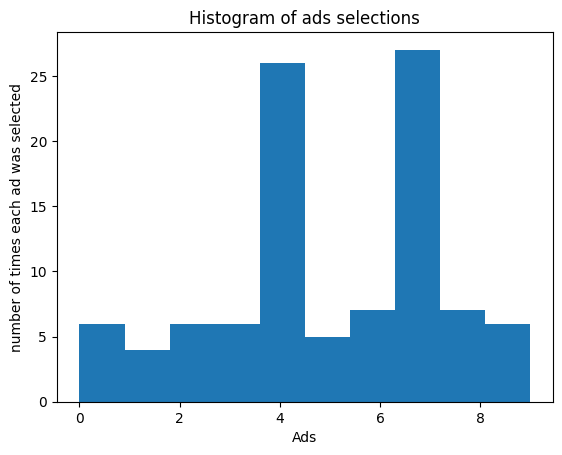

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('number of times each ad was selected')

plt.show()